In [184]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [185]:
image  = Image.open('/home/ec2-user/SageMaker/BrainScans/misc_images/brain11.jpg')

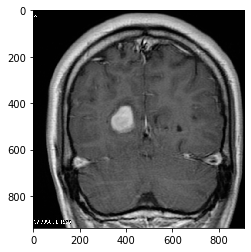

In [186]:

imagecv2 = cv2.imread("misc_images/brain11.jpg")
plt.imshow(imagecv2)
#image.show()



In [187]:
model = tf.keras.models.load_model('model/')

In [188]:
new_image = image.resize((224, 224))
new_image.save('image-size.png')

In [189]:
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
dropout_140 (Dropout)        (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
dropout_141 (Dropout)        (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 20736)           

You have a tumor 99.48225021362305 %


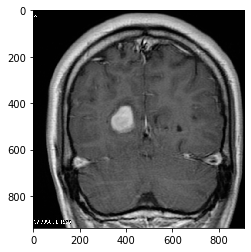

In [190]:

x = img_to_array(new_image)
x = np.expand_dims(x, axis=0)
preds = model.predict_classes(x)
prob = model.predict(x)






if preds==1:
    print("You have a tumor",prob.max()*100,"%") 
else:
    print("You dont have a tumor", prob.max()*100,"%")
#print(preds, prob.max())
plt.imshow(imagecv2)
